In [1]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import requests
import os

In [2]:
my_dict = {
    'city1': ['/Users/shivam_goyal/Desktop/CS542/Common Task/Austin.csv', 'Austin'],
    'city2': ['/Users/shivam_goyal/Desktop/CS542/Common Task/Chicago.csv', 'Chicago'],
    'city3': ['/Users/shivam_goyal/Desktop/CS542/Common Task/Miami.csv', 'Miami'],
    'city4': ['/Users/shivam_goyal/Desktop/CS542/Common Task/NewYork.csv', 'New York']
}

In [3]:
def getTempData(filepath, location, unit_group = 'us'):
    # print(location)
    df_weather = pd.DataFrame()
    API_KEY = 'VENCPWR7E54MZ9DQ2UGL7WKMX'
    previous_day_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
    same_day_date = datetime.now().strftime('%Y-%m-%d')
    url = f'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{location}/{same_day_date}?unitGroup={unit_group}&key={API_KEY}&include=obs'
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        same_day_date = data['days'][0]
        
        temp_df = pd.DataFrame([{
        'name': location,
        'datetime': datetime.now(),
        'tempmax': same_day_date.get('tempmax'),
        'tempmin': same_day_date.get('tempmin'),
        'temp': same_day_date.get('temp'),
        'feelslikemax': same_day_date.get('feelslikemax'),
        'feelslikemin': same_day_date.get('feelslikemin'),
        'feelslike': same_day_date.get('feelslike'),
        'dew': same_day_date.get('dew'),
        'humidity': same_day_date.get('humidity'),
        'precip': same_day_date.get('precip'),
        'precipprob': same_day_date.get('precipprob'),
        'precipcover': same_day_date.get('precipcover'),
        'preciptype': same_day_date.get('preciptype'),
        'snow': same_day_date.get('snow'),
        'snowdepth': same_day_date.get('snowdepth'),
        'windgust': same_day_date.get('windgust'),
        'windspeed': same_day_date.get('windspeed'),
        'winddir': same_day_date.get('winddir'),
        'sealevelpressure': same_day_date.get('sealevelpressure'),
        'cloudcover': same_day_date.get('cloudcover'),
        'visibility': same_day_date.get('visibility'),
        'solarradiation': same_day_date.get('solarradiation'),
        'solarenergy': same_day_date.get('solarenergy'),
        'uvindex': same_day_date.get('uvindex'),
        'severerisk': same_day_date.get('severerisk'),
        'sunrise': same_day_date.get('sunrise'),
        'sunset': same_day_date.get('sunset'),
        'moonphase': same_day_date.get('moonphase'),
        'conditions': same_day_date.get('conditions'),
        'description': same_day_date.get('description'),
        'icon': same_day_date.get('icon'),
        'stations': same_day_date.get('stations'),
    }])
        df_weather = pd.concat([df_weather, temp_df], ignore_index=True)
        # df_weather.fillna(0, inplace=True)
        # print(df_weather.columns)

        df_weather.to_csv(filepath, mode='a', header=not os.path.exists(filepath), index=False) # Assuming you don't want to write the index
        # return df_weather
    else:
        print(f"Failed to retrieve data for {location}")
            

In [4]:
austin = getTempData(my_dict['city1'][0],my_dict['city1'][1])
chicago = getTempData(my_dict['city2'][0],my_dict['city2'][1])
miami = getTempData(my_dict['city3'][0],my_dict['city3'][1])
new_york = getTempData(my_dict['city4'][0],my_dict['city4'][1])

In [5]:
updated_data_austin = pd.read_csv(my_dict['city1'][0], on_bad_lines='skip')
updated_data_austin.fillna(0, inplace=True)

updated_data_chicago = pd.read_csv(my_dict['city2'][0], on_bad_lines='skip')
updated_data_chicago.fillna(0, inplace=True)

updated_data_miami = pd.read_csv(my_dict['city3'][0], on_bad_lines='skip')
updated_data_miami.fillna(0, inplace=True)


updated_data_new_york = pd.read_csv(my_dict['city4'][0], on_bad_lines='skip')
updated_data_new_york.fillna(0, inplace=True)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
R2 Score: 0.9804435982496621


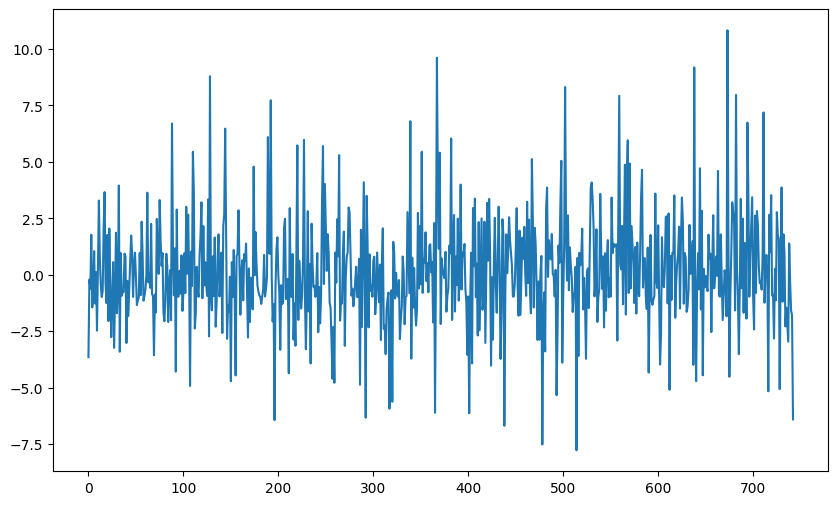

SVR(C=1, epsilon=0.01, gamma=1)
Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


R2 Score: 0.9780670445371771


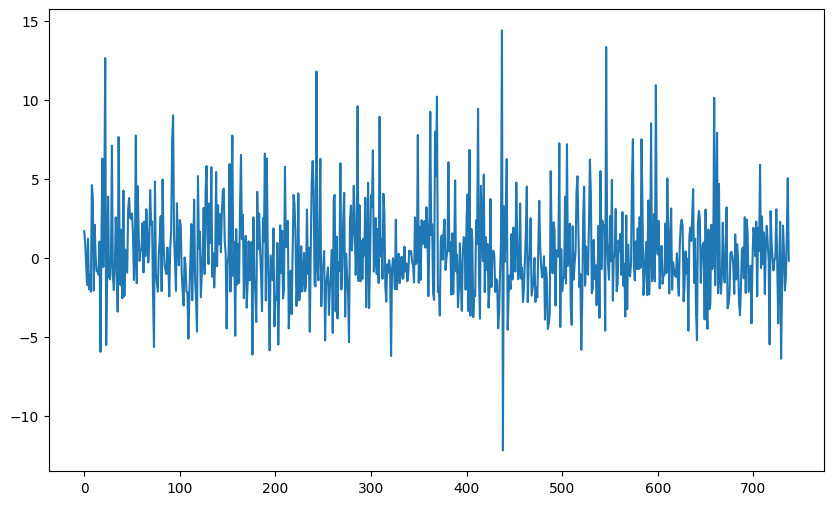

SVR(C=1, epsilon=0.01, gamma='auto')
Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


R2 Score: 0.9323729505294207


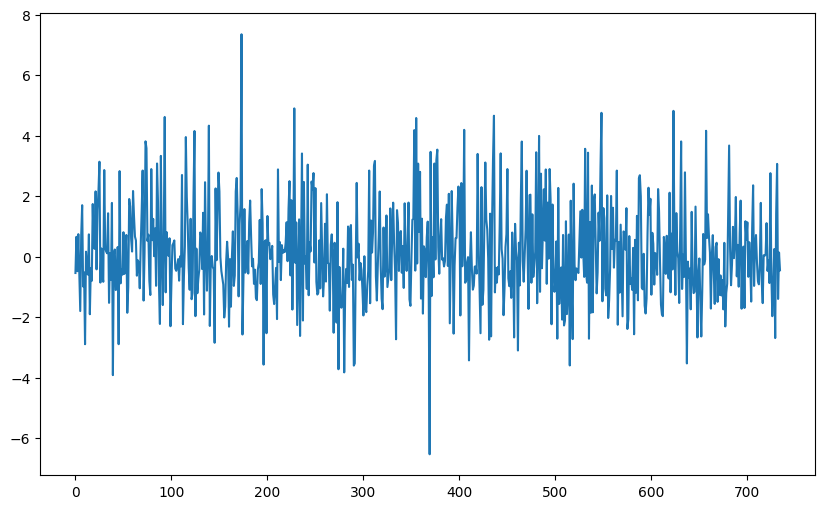

SVR(C=1, epsilon=0.01, kernel='linear')
Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


R2 Score: 0.9809914446878057


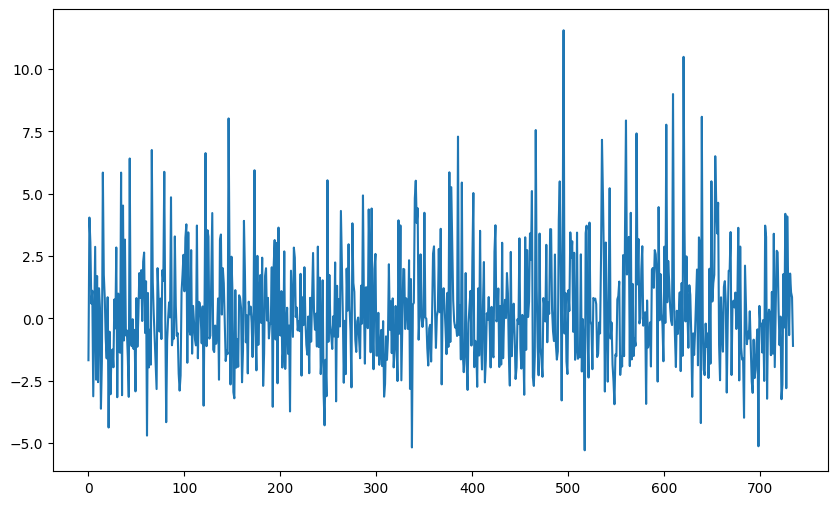

SVR(C=1, epsilon=0.01, gamma='auto')


/usr/local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [6]:
def getPrediction(data):
    # Feature selection
    features_to_include = ['humidity', 'windgust', 'cloudcover', 'dew', 'windspeed', 'uvindex', 'solarradiation', 'solarenergy', 'precip']
    # X = data[['humidity', 'windgust', 'cloudcover', 'dew', 'windspeed', 'uvindex', 'solarradiation', 'solarenergy', 'precip']]
    # Latest Values 
    last_row = data.iloc[-1]
    values_from_df = last_row[features_to_include].values

    # delete last col
    data.drop(data.tail(1).index, inplace=True)
    # data.drop(data.tail(1).index, inplace=True)
    
    X=data[features_to_include]
    y = data['tempmax']
    
    # Train-test split on original data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Normalize features and target variable
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()
    
    svr_regr = SVR()
    
    param_grid_svr = {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.01, 0.1, 1],
        'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1]
    }
    
    # Perform Grid Search with Cross Validation
    grid_search_svr = GridSearchCV(svr_regr, param_grid_svr, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid_search_svr.fit(X_train_scaled, y_train_scaled)
    
    best_svr_regr = grid_search_svr.best_estimator_
    
    # Predictions on test set
    y_pred_scaled = best_svr_regr.predict(X_train_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    r2 = r2_score(y_train, y_pred)
    print("R2 Score:", r2)
    l = []
    for i in range(0,len(y_pred_scaled)):
      l.append(i)
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(l,y_train-y_pred)
    plt.show()

    # print(len(features_to_include))
    print(best_svr_regr)
    
    # Update the values in X_test_new with the values from the DataFrame
    X_test_new = values_from_df
    X_test_new_scaled = scaler_X.transform(X_test_new.reshape(1, -1))  
    # print(X_test_new_scaled)
    predicted_temp_max=scaler_y.inverse_transform(best_svr_regr.predict(X_test_new_scaled).reshape(-1,1))
    
    
    
    return (predicted_temp_max)

# print([my_dict['city1'][1]])
new_df=pd.DataFrame({'Location':[my_dict['city1'][1],my_dict['city2'][1],my_dict['city3'][1],my_dict['city4'][1]],
                     'Predicted_tempmax' : [getPrediction(updated_data_austin)[0][0],getPrediction(updated_data_chicago)[0][0],
                                           getPrediction(updated_data_miami)[0][0], getPrediction(updated_data_new_york)[0][0]]})

In [7]:
new_df.to_csv('predicted_temperature_max.csv')